<h1>Importando os Dados</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DataFrame = pd.read_csv('kc_house_data.csv', encoding='UTF-8', sep=";")
DataFrame.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19153,3918400097,2014-11-17,5.670000e+05,4,1.75,2630,11213,1.0,0,2,...,8,1430,1200,1948,0,98177,"47,7158","-122,3660",2240,15186
17635,4006000423,2015-01-08,2.300000e+05,4,1.00,1870,14703,1.5,0,0,...,6,1090,780,1928,0,98118,"47,5274","-122,2810",1650,6045
1973,952005224,2014-11-05,4.090000e+05,2,1.00,890,3271,1.0,0,0,...,6,890,0,1918,0,98116,"47,5631","-122,3810",1190,5175
5255,1245003375,2015-04-08,6.580000e+05,3,1.00,1290,12005,1.0,0,0,...,7,1290,0,1966,0,98033,"47,6835","-122,1990",1930,8000
10625,2619950400,2014-07-14,3.968000e+05,4,2.50,2200,6018,2.0,0,0,...,8,2200,0,2010,0,98019,"47,7338","-121,9660",2480,5899
15011,9541800190,2014-10-10,9.150000e+05,5,2.50,3490,18850,1.0,0,4,...,9,1840,1650,1958,0,98005,"47,5955","-122,1760",2690,11625
14412,2592220040,2014-07-24,9.743500e+05,4,2.50,3090,10730,2.0,0,0,...,8,2420,670,1985,0,98006,"47,5458","-122,1410",2220,7875
15304,7806500290,2014-08-18,5.350000e+05,3,2.50,2790,19485,2.0,0,0,...,9,2790,0,1990,0,98059,"47,4688","-122,1240",2580,17859
20651,4188300030,2015-04-29,7.150000e+05,5,3.00,3490,6091,2.0,0,0,...,9,3490,0,2009,0,98011,"47,7744","-122,2250",2870,5932
3853,9184700535,2015-04-13,1.075000e+09,4,2.25,2820,5000,1.5,0,2,...,9,1800,1020,1926,0,98122,"47,6097","-122,2870",2880,6000


In [2]:
!pip install seaborn --upgrade #or also !pip install seaborn==0.9.0

ERROR: Invalid requirement: '#or'


In [3]:
print(DataFrame.price.min())
DataFrame.price.max()


75000.0


316875000000.0

<h3>A empresa, House Rocket, deseja obter infromações e o direcionamento de mercado de casas na cidade de King County, USA, para isto ela levantou as seguintes questões: </h3>
<h3> 
    <ol>
    <li>Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?</li>  <br>   
    <li>Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?</li>   <br>  
    <li> A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?</li>       
    </ol>
</h3>

<h6>Informações</h6>

sqft_basement = tamanho do porão

sqft_above = tamanho segundo andar

yr_built = ano de construção

yr_renovated = ano da reforma

# Observando casas reformadas para calcular sua valorização

In [4]:
Renovated = DataFrame[DataFrame['yr_renovated']!=0]
Unrenovated = DataFrame[DataFrame['yr_renovated']==0]

In [5]:
DataFrame.loc[0,:]

id               7129300520
date             2014-10-13
price              221900.0
bedrooms                  3
bathrooms               1.0
sqft_living            1180
sqft_lot               5650
floors                  1.0
waterfront                0
view                      0
condition                 3
grade                     7
sqft_above             1180
sqft_basement             0
yr_built               1955
yr_renovated              0
zipcode               98178
lat                 47,5112
long              -122,2570
sqft_living15          1340
sqft_lot15             5650
Name: 0, dtype: object

In [6]:
Ren = Renovated['price'].mean()
Ren

1446211405.583151

In [7]:
Unr = Unrenovated['price'].mean()
Unr

529524767.00782645

In [8]:
print(Ren - Unr)

916686638.5753247


<h3> Pelos passos acima podemos perceber que na média as casas reformadas são mais valorizadas que as casas sem reforma.
    
Sendo assim seria interessante o CEO reformar a casa antes de Vendê-la.
</h3>

<h3> Seguindo esta lógica, o recomendado seria o CEO comprar uma casa mais barata para reformar e revender.<br>
    
Primeiramente será analisada a casa que esteja entre as mais antigas e será verificado se esta resulta na casa mais barata, ou em um preço baixo.</h3>



# Buscando a casa mais antiga para comparar com o preço da mais barata

In [9]:
Cheaper = Unrenovated[Unrenovated['yr_built'] == Unrenovated['yr_built'].min()]
CheapestElderHouse = Cheaper[Cheaper['price'] == Cheaper['price'].min()]
print(CheapestElderHouse)
CheapestElderHouse['condition']

               id        date     price  bedrooms  bathrooms  sqft_living  \
14001  2354300456  2015-03-11  130000.0         2        1.0          600   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
14001      1500     1.0           0     0  ...      4         600   

       sqft_basement  yr_built  yr_renovated  zipcode      lat       long  \
14001              0      1900             0    98027  47,5289  -122,0330   

      sqft_living15  sqft_lot15  
14001          1130        6000  

[1 rows x 21 columns]


14001    4
Name: condition, dtype: int64

In [10]:
CheapestHouse = Unrenovated[Unrenovated['price'] == Unrenovated['price'].min()]
print(CheapestHouse)
CheapestHouse['condition']

              id        date    price  bedrooms  bathrooms  sqft_living  \
1149  3421079032  2015-02-17  75000.0         1        0.0          670   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
1149     43377     1.0           0     0  ...      3         670   

      sqft_basement  yr_built  yr_renovated  zipcode      lat       long  \
1149              0      1966             0    98022  47,2638  -121,9060   

     sqft_living15  sqft_lot15  
1149          1160       42882  

[1 rows x 21 columns]


1149    3
Name: condition, dtype: int64

<h3> Diferente do esperado, nos resultados acima foi encontrada a casa mais antiga não renovada no valor de 130 mil, e também a mais barata encontrada no banco de dados, no valor de 75 mil.
    
    Analisando os preços pode-se dizer que não existe motivos evidentes para o CEO comprar a casa mais antiga, pois ambas casas tem o espaço de construção parecido (sqft_living) e apesar da casa de 75 mil estar numa condição pior e ter menos banheiros e quartos, isto pode ser solucionado na reforma, valorizando a casa, além de pagar 55 mil a menos. <br>
    
Apenas faria sentido comprar a casa antiga se fosse para uso imediato, sem pretensões de lucro, pois ela dispõe de uma melhor condição de moradia e recursos que a casa de 75 mil.
    
<br>
Sendo assim seria indicado que o CEO comprasse casas baratas no geral, entre 75 mil e 100mil, não importando muito com seu tempo de construção, uma vez que este não indica uma diminuição nos preços e nem com suas condições e itens como banheiros e quartos, uma vez que estes itens poderiam ser construidos numa reforma desde que o "sqft_lot" o possibilite.
</h3>

# Entendendo se o ZipCode impacta nos preços das casas

In [11]:
df = DataFrame.groupby('zipcode').mean()
df2 = DataFrame.groupby('zipcode').median()
df3 = DataFrame.groupby('zipcode').std()
ExpensiveZip = df[df['price'] == df['price'].max()]
print('ZipCode com casas mais caras em média', ExpensiveZip.index.values[0], 'valor médio', df['price'].max())

ZipCode com casas mais caras em média 98039 valor médio 14294837700.0


In [12]:
CheapZip = df[df['price'] == df['price'].min()]
CheapZipmedian = df2[df2['price'] == df2['price'].min()]
CheapZipstd = df3[df3['price'] == df3['price'].min()]
generalMean = DataFrame['price'].mean()
generalMedian = DataFrame['price'].median()
generalstd = DataFrame['price'].std()
print('ZipCode com as casas de médias mais baratas fica no ',CheapZip.index.values,
      'valor médio de: %i' %(df['price'].min()))
print('média geral é de: %i' %(generalMean))
print('ZipCode com as casas de menor mediana fica no ',CheapZipmedian.index.values,
      'valor médio de: %i' %(df2['price'].min()))
print('média geral é de: %i' %(generalMedian))
print('ZipCode com as casas com menor desvio padrão fica no ',CheapZipstd.index.values,
      'valor médio de: %i' %(df3['price'].min()))
print('média geral é de: %i' %(generalstd))

ZipCode com as casas de médias mais baratas fica no  [98002] valor médio de: 234284
média geral é de: 568290860
ZipCode com as casas de menor mediana fica no  [98002 98168] valor médio de: 235000
média geral é de: 450000
ZipCode com as casas com menor desvio padrão fica no  [98002] valor médio de: 52041
média geral é de: 8516008693


<h3> Outra variável que pode impactar o preço da casa é a localização, podemos análisar isso através da coluna "zipcode", e como visto anteriormente nos resultados seria interessante evitar o zipcode 98002, já que as medidas estatísticas apontam para um baixo valor das casas além de uma taxa de preço com pequenas variações, ou seja, muito provavelmente a localização tem grande impacto no valor da casa.<br>

<br>
Sabendo o valor médio das casas em King County, é possível afirmar que a reforma é uma boa estratégia, uma vez que o valor médio das casas reformadas, que é de 1.446.211.405, é maior que o valor médio das casas em geral e das casas não reformadas, como visto anteriormente.
</h3>

In [13]:
ID_Duplo = DataFrame[DataFrame['id'].duplicated(keep = False)]

ID_Duplo_Length = ID_Duplo.shape[0]
#CALCULANDO A VALORIZAÇÃO/DESVALORIZAÇÃO PELO TEMPO ENTRE OS IDS IGUAIS E SALVANDO OS VALORES EM meanProfit
meanProfit = []
for i in range(0, ID_Duplo_Length, 2):
    if(i+1 < ID_Duplo_Length):
        locActual = ID_Duplo.iloc[i,:]
        locProx = ID_Duplo.iloc[i+1,:]
        if(locActual.id == locProx.id):
            if locActual['date'] > locProx['date']:
                meanProfit.append(locActual['price']/locProx['price'])
            else:
                meanProfit.append(locProx['price']/locActual['price'])
        else:
            meanProfit.append(0)
    else:
        meanProfit.append(0)
        
#montando DataFrame com a valorização ou desvalorização dos imóveis
df_meanProfit = pd.DataFrame(meanProfit, columns = ['percentage'])    
df_meanProfit = df_meanProfit[df_meanProfit['percentage'] != 0]
#Passando de lista para DataFrame e retirando valores zerados

df_meanProfit.sort_values(by=['percentage'])

,percentage
59,0.000099
1,0.001012
37,0.001024
118,0.945946
42,0.960686
...,...
87,2.764706
127,2.969697
145,3.308271
120,4.218009


<h3> É possível perceber que existem algumas porcentagens atuando como outliers para cima, como um aumento de 718875.81%, quanto para baixo, como um "aumento" de 0.000084%, ou seja, uma diminuição. Sendo assim será removido tanto os 5 maiores quanto os 5 menores valores  </h3>

In [14]:
for i in range(5):
    df_meanProfit = df_meanProfit[df_meanProfit['percentage'] != df_meanProfit['percentage'].max()]
    df_meanProfit = df_meanProfit[df_meanProfit['percentage'] != df_meanProfit['percentage'].min()]
df_meanProfit.sort_values(by=['percentage'])
#Aqui já é possível ver valores mais 'reais', para realização de uma boa análise

,percentage
7,0.976628
91,0.978000
137,0.990291
131,1.000000
33,1.000000
...,...
64,2.319149
94,2.326531
108,2.371429
157,2.444444


In [15]:
df_meanProfit.mean()

percentage    1.565555
dtype: float64

In [16]:
df_meanProfit.median()

percentage    1.578947
dtype: float64

In [17]:
df_meanProfit.mode()

,percentage
0,1.000000
1,1.238095


<AxesSubplot:title={'center':'Distribuição de Frequências - Acumulo dos valores dos calculos da valorização com o tempo'}, xlabel='Porcentagem de valorização', ylabel='Count'>

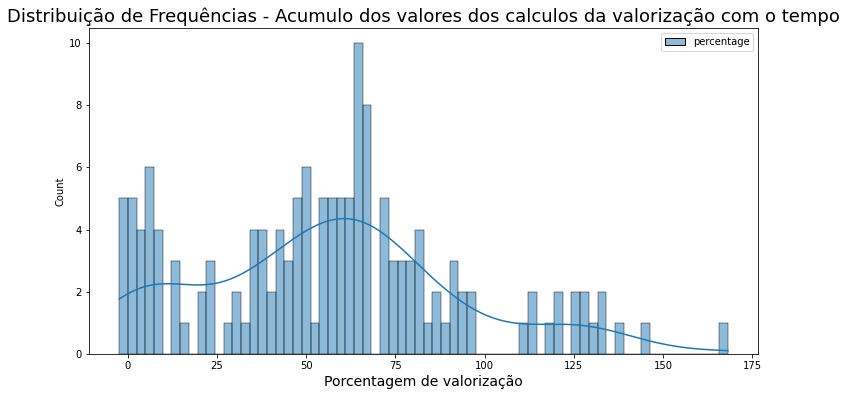

In [18]:
ax = sns.histplot((df_meanProfit-1)*100, bins = 70, kde = True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Acumulo dos valores dos calculos da valorização com o tempo', fontsize=18)
ax.set_xlabel('Porcentagem de valorização', fontsize=14)
ax

<h2> Pode-se inferir pelo resultado da média que as casas tendem a valorizar cerca de 25% com o tempo, porém se analisarmos a mediana, a moda e o gráfico acima, é possível observar que o maioria das casas tendem a desvalorizar com o tempo, uma vez que a mediana é menor que 1, ou seja, existe uma desvalorização na maioria das casas, o que também é possível de se observar no gráfico. Sendo assim, apenas esperar o tempo passar, não garantirá uma venda em um valor maior.
<br><br><br>
    Abaixo é explorado em qual mês o valor de venda é maior de acordo com os dados.
</h2>

In [19]:
DataFrame['date'] = pd.to_datetime(DataFrame['date'])
for i in range(12):
    meanMonth = DataFrame[DataFrame['date'].dt.month == i+1]
    print('a média de valor no mês', i+1, 'é de:', format(meanMonth['price'].mean(),'.1E'))

a média de valor no mês 1 é de: 3.8E+08
a média de valor no mês 2 é de: 5.3E+08
a média de valor no mês 3 é de: 4.3E+08
a média de valor no mês 4 é de: 2.2E+08
a média de valor no mês 5 é de: 5.1E+08
a média de valor no mês 6 é de: 5.2E+08
a média de valor no mês 7 é de: 1.1E+09
a média de valor no mês 8 é de: 6.6E+08
a média de valor no mês 9 é de: 5.9E+08
a média de valor no mês 10 é de: 7.6E+08
a média de valor no mês 11 é de: 4.3E+08
a média de valor no mês 12 é de: 6.0E+08


<AxesSubplot:title={'center':'Média dos preços das casas de acordo com o mês'}, xlabel='Mês', ylabel='Preço em Bilhões'>

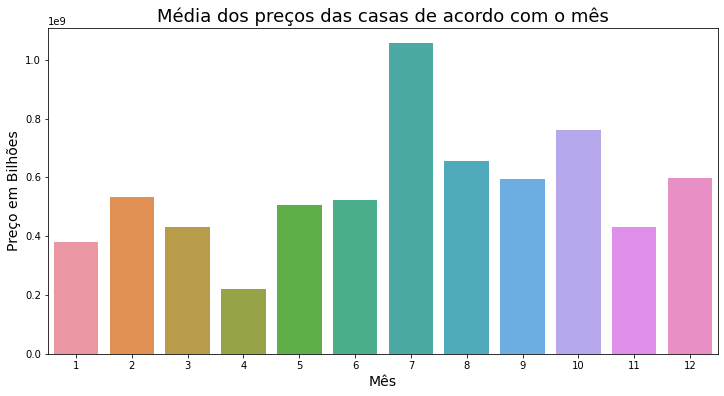

In [20]:
data_month = DataFrame
data_month['month'] = data_month['date'].dt.month


ax = sns.barplot(x = [i for i in range(1,13)], y =data_month.groupby('month').price.mean())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o mês', fontsize=18)
ax.set_xlabel('Mês', fontsize=14)
ax.set_ylabel('Preço em Bilhões', fontsize=14)
ax

<h2> Vimos que o valor de vendas começa a aumentar em maio(5) atinge o auge em julho(7) e
em seguida os valores diminuem alcançando uma baixa em novembro(11), se igualando com vendas do primeiro semestre exceto abril(4).<br><br><br> Abaixo a análise a ser feita vai além dos meses mas também em qual ano foram feitas essas vendas.</h2>

In [21]:
for j in range(2014, 2016, 1):
    for i in range(12):
        meanMonth = DataFrame[DataFrame['date'].dt.month == i+1]
        meanMonthPerYear = meanMonth[meanMonth['date'].dt.year == j]
        print('a média de valor no mês', i+1, 'no ano de', j,'é de:', format(meanMonthPerYear['price'].mean(),'.1E'))

a média de valor no mês 1 no ano de 2014 é de: NAN
a média de valor no mês 2 no ano de 2014 é de: NAN
a média de valor no mês 3 no ano de 2014 é de: NAN
a média de valor no mês 4 no ano de 2014 é de: NAN
a média de valor no mês 5 no ano de 2014 é de: 3.1E+08
a média de valor no mês 6 no ano de 2014 é de: 5.2E+08
a média de valor no mês 7 no ano de 2014 é de: 1.1E+09
a média de valor no mês 8 no ano de 2014 é de: 6.6E+08
a média de valor no mês 9 no ano de 2014 é de: 5.9E+08
a média de valor no mês 10 no ano de 2014 é de: 7.6E+08
a média de valor no mês 11 no ano de 2014 é de: 4.3E+08
a média de valor no mês 12 no ano de 2014 é de: 6.0E+08
a média de valor no mês 1 no ano de 2015 é de: 3.8E+08
a média de valor no mês 2 no ano de 2015 é de: 5.3E+08
a média de valor no mês 3 no ano de 2015 é de: 4.3E+08
a média de valor no mês 4 no ano de 2015 é de: 2.2E+08
a média de valor no mês 5 no ano de 2015 é de: 1.0E+09
a média de valor no mês 6 no ano de 2015 é de: NAN
a média de valor no mês 7 n

In [22]:
data_month = DataFrame
data_month['year-month'] = (data_month['date'].dt.year).astype(str) + '/' + (data_month['date'].dt.month).astype(str)

label = data_month['year-month'].value_counts().index


label 


Index(['2015/4', '2014/7', '2014/6', '2014/8', '2014/10', '2015/3', '2014/9',
       '2014/5', '2014/12', '2014/11', '2015/2', '2015/1', '2015/5'],
      dtype='object')

In [23]:
label = ['2015/04', '2014/07', '2014/06', '2014/08', '2014/10', '2015/03', '2014/09',
       '2014/05', '2014/12', '2014/11', '2015/02', '2015/01', '2015/05']
label = sorted(label)
values = data_month.groupby('year-month').price.mean()

values.index

Index(['2014/10', '2014/11', '2014/12', '2014/5', '2014/6', '2014/7', '2014/8',
       '2014/9', '2015/1', '2015/2', '2015/3', '2015/4', '2015/5'],
      dtype='object', name='year-month')

<AxesSubplot:title={'center':'Média dos preços das casas de acordo com o mês e ano'}, xlabel='Ano / Mês', ylabel='Preço em Bilhões'>

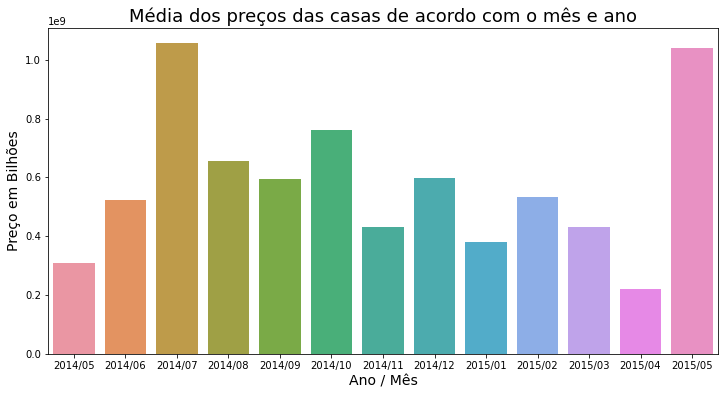

In [24]:
values.index = ['2014/10', '2014/11', '2014/12', '2014/05', '2014/06', '2014/07', '2014/08',
       '2014/09', '2015/01', '2015/02', '2015/03', '2015/04', '2015/05']

ax = sns.barplot(x = label , y = values.sort_index())
ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o mês e ano', fontsize=18)
ax.set_xlabel('Ano / Mês', fontsize=14)
ax.set_ylabel('Preço em Bilhões', fontsize=14)
ax

<h2> Nesta análise vê-se que os dados confirmam a ideia de que as vendas a partir de julho tendem a ser maiores e também é possível inferir uma valorização nas casas de 2014 para 2015, desta forma uma estratégia de negócio seria esperar a valorização do imóvel de um ano para o outro, se esta for uma opção viável.<br><br><br> A análise abaixo busca compreender o impacto do número de banheiros no valor da casa.</h2>

In [25]:
bathrooms = DataFrame['bathrooms'].value_counts().sort_index()
save = bathrooms.tolist()
#print(bathrooms)
for i in range(len(bathrooms)):
    if i>3:
        meanVal = DataFrame[DataFrame['bathrooms'] == (i/4)]
        print('a média de valor para', i*0.25, 'banheiros é de:', format(meanVal['price'].mean(),'.1E'))
        save[i-3] = (meanVal['price'].mean())
    else:
        if i == 0:
            meanVal = DataFrame[DataFrame['bathrooms'] == i]
            print('a média de valor para', i, 'banheiros é de:', format(meanVal['price'].mean(),'.1E'))
            save[i] = (meanVal['price'].mean())
            
        elif i==1:
            meanVal = DataFrame[DataFrame['bathrooms'] == 7.5]
            print('a média de valor para', 7.5, 'banheiros é de:', format(meanVal['price'].mean(),'.1E'))
            save[27] = (meanVal['price'].mean())
            
        elif i==2:
            meanVal = DataFrame[DataFrame['bathrooms'] == 7.75]
            print('a média de valor para', 7.75, 'banheiros é de:', format(meanVal['price'].mean(),'.1E'))
            save[28] = (meanVal['price'].mean())

        elif i==3:
            meanVal = DataFrame[DataFrame['bathrooms'] == 8]
            print('a média de valor para', 8, 'banheiros é de:', format(meanVal['price'].mean(),'.1E'))
            save[29] = (meanVal['price'].mean())


a média de valor para 0 banheiros é de: 1.3E+10
a média de valor para 7.5 banheiros é de: 4.5E+05
a média de valor para 7.75 banheiros é de: 6.9E+09
a média de valor para 8 banheiros é de: 5.0E+06
a média de valor para 1.0 banheiros é de: 2.7E+07
a média de valor para 1.25 banheiros é de: 2.9E+08
a média de valor para 1.5 banheiros é de: 8.2E+06
a média de valor para 1.75 banheiros é de: 6.2E+07
a média de valor para 2.0 banheiros é de: 2.4E+07
a média de valor para 2.25 banheiros é de: 2.8E+08
a média de valor para 2.5 banheiros é de: 2.9E+08
a média de valor para 2.75 banheiros é de: 8.6E+08
a média de valor para 3.0 banheiros é de: 6.6E+08
a média de valor para 3.25 banheiros é de: 3.5E+09
a média de valor para 3.5 banheiros é de: 2.9E+09
a média de valor para 3.75 banheiros é de: 3.8E+09
a média de valor para 4.0 banheiros é de: 6.9E+09
a média de valor para 4.25 banheiros é de: 7.3E+09
a média de valor para 4.5 banheiros é de: 9.0E+09
a média de valor para 4.75 banheiros é de: 2.2

In [26]:
classes = [0, 0.99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99, 100]
labels = [0, 1, 2, 3, 4, 5, 6, '7+']
df_bathrooms = DataFrame
df_bathrooms['frequencia'] =  pd.cut(x = df_bathrooms.bathrooms,
         bins = classes,
         labels = labels,
         include_lowest = True)
df_bathrooms[df_bathrooms['frequencia'] == 1].price.mean()

37012954.615439855

Text(0, 0.5, 'Preço em 10 Bilhões')

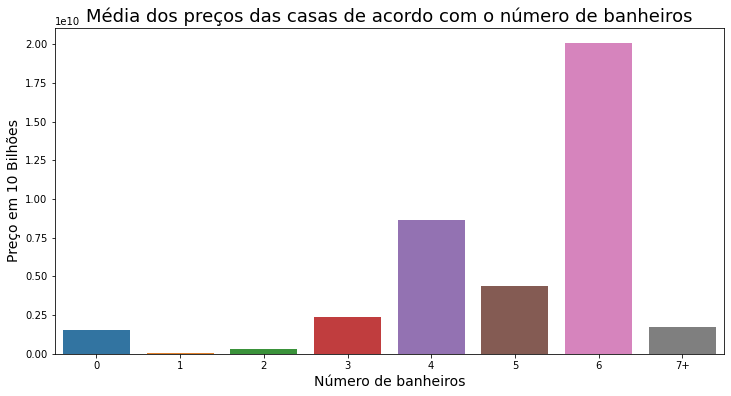

In [27]:
ax = sns.barplot(x = labels, y = df_bathrooms.groupby('frequencia').price.mean())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de banheiros', fontsize=18)
ax.set_xlabel('Número de banheiros', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

Text(0, 0.5, 'Preço em 100 Milhões')

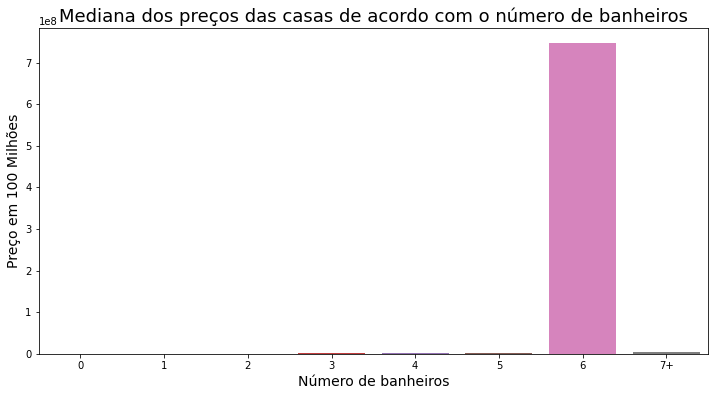

In [28]:
ax = sns.barplot(x = labels, y = df_bathrooms.groupby('frequencia').price.median())

ax.figure.set_size_inches(12, 6)
ax.set_title('Mediana dos preços das casas de acordo com o número de banheiros', fontsize=18)
ax.set_xlabel('Número de banheiros', fontsize=14)
ax.set_ylabel('Preço em 100 Milhões', fontsize=14)

Text(0, 0.5, 'Preço em 10 Bilhões')

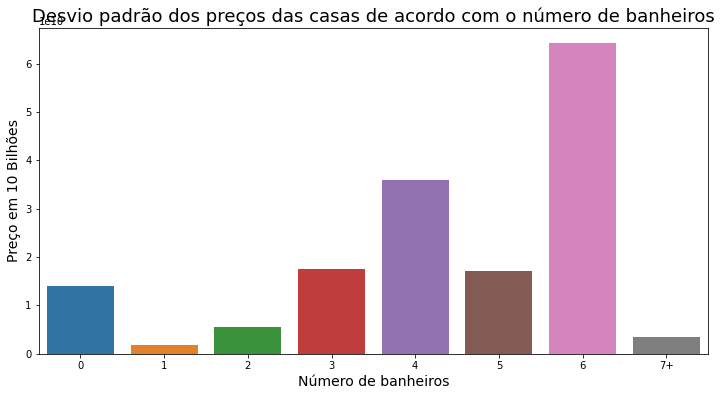

In [29]:
ax = sns.barplot(x = labels, y = df_bathrooms.groupby('frequencia').price.std())

ax.figure.set_size_inches(12, 6)
ax.set_title('Desvio padrão dos preços das casas de acordo com o número de banheiros', fontsize=18)
ax.set_xlabel('Número de banheiros', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

<h2> Pode-se observar que o número de banheiros provavelmente não é a variável que mais afeta o preço das casas, porém é interessante analisar que as casas da classe 6 banheiros tem uma valorização alta.</h2>

<h2> As análises abaixo serão feitas de mesma forma, mas levará em conta o número de quartos, andares, fontes de água frontal e view(que eu assumi como vista para pontos turísticos ou então paisagens).</h2>

In [30]:
bedrooms = DataFrame['bedrooms'].value_counts().sort_index()
save = bedrooms.tolist()
#print(bedrooms)
for i in range(len(bedrooms)):
    if i == 12:
        meanVal = DataFrame[DataFrame['bedrooms'] == 33]
        print('a média de valor para', 33, 'quartos é de:', format(meanVal['price'].mean(),'.1E'))
        save[i] = (meanVal['price'].mean())
    else:    
        meanVal = DataFrame[DataFrame['bedrooms'] == i]
        print('a média de valor para', i, 'quarto(s) é de:', format(meanVal['price'].mean(),'.1E'))
        save[i] = (meanVal['price'].mean())

        
    
    

a média de valor para 0 quarto(s) é de: 1.0E+10
a média de valor para 1 quarto(s) é de: 6.6E+06
a média de valor para 2 quarto(s) é de: 1.1E+08
a média de valor para 3 quarto(s) é de: 1.3E+08
a média de valor para 4 quarto(s) é de: 7.7E+08
a média de valor para 5 quarto(s) é de: 3.1E+09
a média de valor para 6 quarto(s) é de: 6.9E+08
a média de valor para 7 quarto(s) é de: 1.1E+08
a média de valor para 8 quarto(s) é de: 1.1E+06
a média de valor para 9 quarto(s) é de: 8.9E+05
a média de valor para 10 quarto(s) é de: 3.8E+08
a média de valor para 11 quarto(s) é de: 5.2E+05
a média de valor para 33 quartos é de: 6.4E+05


In [31]:
classes = [0, 0.99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99, 100]
labels = [0, 1, 2, 3, 4, 5, 6, '7+']
df_bedrooms = DataFrame
df_bedrooms['frequencia'] =  pd.cut(x = df_bedrooms.bedrooms,
         bins = classes,
         labels = labels,
         include_lowest = True)
df_bathrooms[df_bathrooms['frequencia'] == 1].price.mean()

6577708.211055276

Text(0, 0.5, 'Preço em 10 Bilhões')

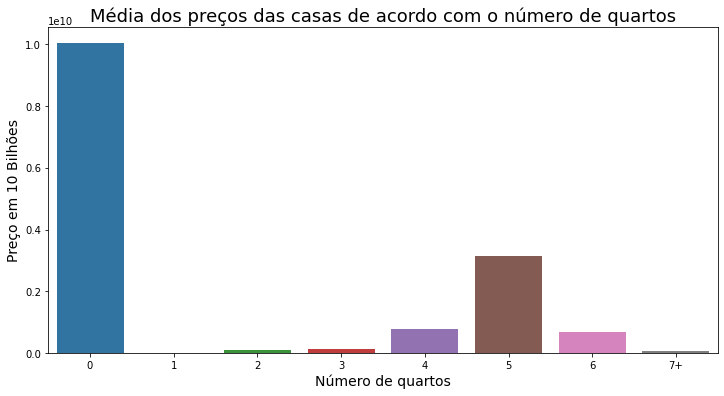

In [32]:
ax = sns.barplot(x = labels, y = df_bedrooms.groupby('frequencia').price.mean())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de quartos', fontsize=18)
ax.set_xlabel('Número de quartos', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

Text(0, 0.5, 'Preço')

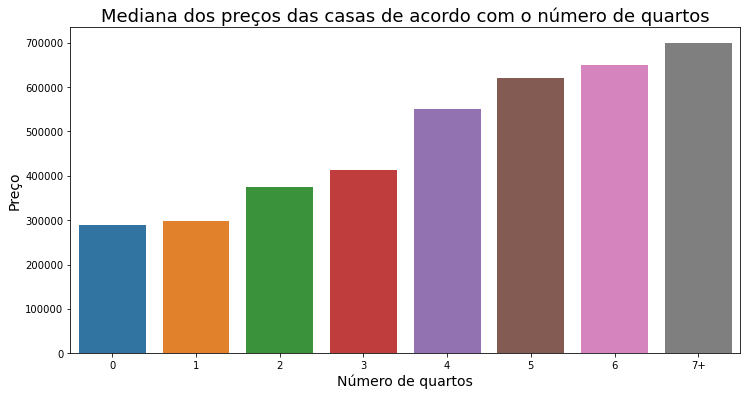

In [33]:
ax = sns.barplot(x = labels, y = df_bedrooms.groupby('frequencia').price.median())

ax.figure.set_size_inches(12, 6)
ax.set_title('Mediana dos preços das casas de acordo com o número de quartos', fontsize=18)
ax.set_xlabel('Número de quartos', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)

Text(0, 0.5, 'Preço em 10 Bilhões')

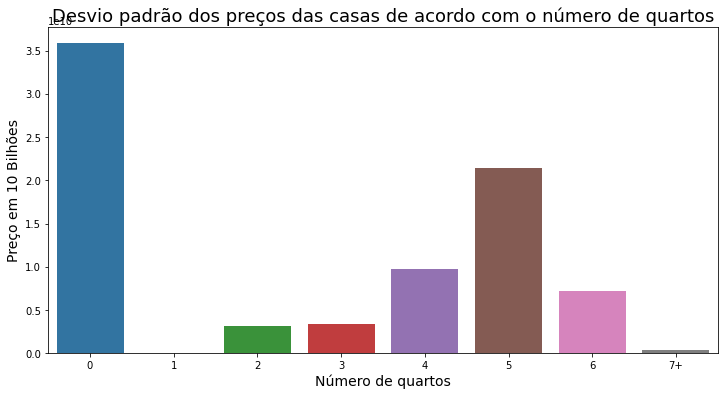

In [34]:
ax = sns.barplot(x = labels, y = df_bedrooms.groupby('frequencia').price.std())

ax.figure.set_size_inches(12, 6)
ax.set_title('Desvio padrão dos preços das casas de acordo com o número de quartos', fontsize=18)
ax.set_xlabel('Número de quartos', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

<h2> Pela média é possível concluir que ter quartos é uma decisão ruim, o que me faz pensar que estes dados não são apenas de casas e sim de qualquer construção, incluindo edifícios para negócios. Entretanto, observando a mediana e desvio padrão podemos perceber que o aumento de quartos tende a aumentar a mediana e o desvio padrão em comparação com a média, sendo assim podemos concluir que o número de quartos influência o valor de uma casa, não de um edifício de negócio onde não existe a necessidade de um quarto. Sendo assim percebo que para analisar melhor a base de dados seria necessário separar as casas das demais construções.</h2>

In [35]:
floors = DataFrame['floors'].value_counts().sort_index()
save = floors.tolist()
#print(floors)
for i in range(len(floors)):
    meanVal = DataFrame[DataFrame['floors'] == ((i*0.5)+1)]
    print('a média de valor para', ((i*0.5)+1), 'andar(es) é de:', format(meanVal['price'].mean(),'.1E'))
    save[i] = (meanVal['price'].mean())


a média de valor para 1.0 andar(es) é de: 1.7E+08
a média de valor para 1.5 andar(es) é de: 3.6E+08
a média de valor para 2.0 andar(es) é de: 1.1E+09
a média de valor para 2.5 andar(es) é de: 1.3E+09
a média de valor para 3.0 andar(es) é de: 5.5E+08
a média de valor para 3.5 andar(es) é de: 1.4E+08


In [36]:
classes = [1, 1.99, 2.99, 100]
labels = [ 1, 2, '3+']
df_floors = DataFrame
df_floors['frequencia'] =  pd.cut(x = df_floors.floors,
         bins = classes,
         labels = labels,
         include_lowest = True)

Text(0, 0.5, 'Preço em Bilhões')

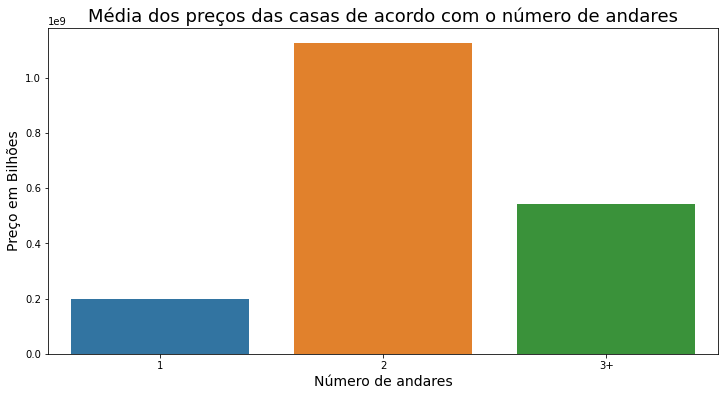

In [37]:
ax = sns.barplot(x = labels, y = df_floors.groupby('frequencia').price.mean())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de andares', fontsize=18)
ax.set_xlabel('Número de andares', fontsize=14)
ax.set_ylabel('Preço em Bilhões', fontsize=14)

Text(0, 0.5, 'Preço')

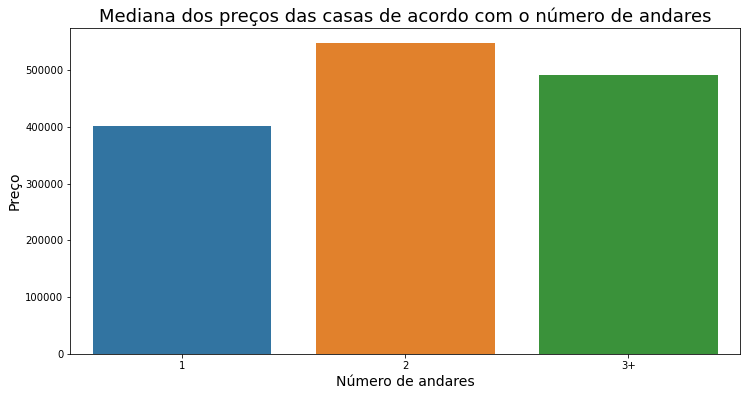

In [38]:
ax = sns.barplot(x = labels, y = df_floors.groupby('frequencia').price.median())

ax.figure.set_size_inches(12, 6)
ax.set_title('Mediana dos preços das casas de acordo com o número de andares', fontsize=18)
ax.set_xlabel('Número de andares', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)

Text(0, 0.5, 'Preço em 10 Bilhões')

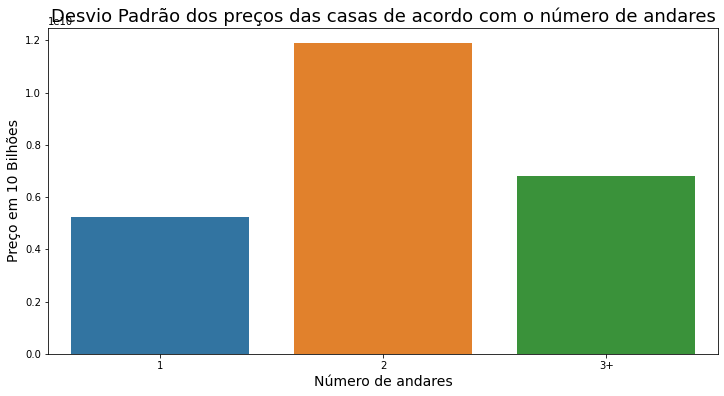

In [39]:
ax = sns.barplot(x = labels, y = df_floors.groupby('frequencia').price.std())

ax.figure.set_size_inches(12, 6)
ax.set_title('Desvio Padrão dos preços das casas de acordo com o número de andares', fontsize=18)
ax.set_xlabel('Número de andares', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

<h2> Assim como nos dados sobre banheiros, nos dados de andares vemos que o ideal do imóvel é ter 2 andares, pois este se mantém em alta tanto na média quanto na mediana, porém como seu desvio padrão também é elevado, podemos concluir que não é somente a quantidade de andares que afetará o preço da casa ou edifício.</h2>

In [40]:
waterfront = DataFrame['waterfront'].value_counts().sort_index()
save = waterfront.tolist()
#print(waterfront)
for i in range(len(waterfront)):
    meanVal = DataFrame[DataFrame['waterfront'] == i]
    print('a média de valor para', i, 'fonte de água frontal é de:', format(meanVal['price'].mean(),'.1E'))
    save[i] = (meanVal['price'].mean())

a média de valor para 0 fonte de água frontal é de: 5.5E+08
a média de valor para 1 fonte de água frontal é de: 2.6E+09


Text(0, 0.5, 'Preço em Bilhões')

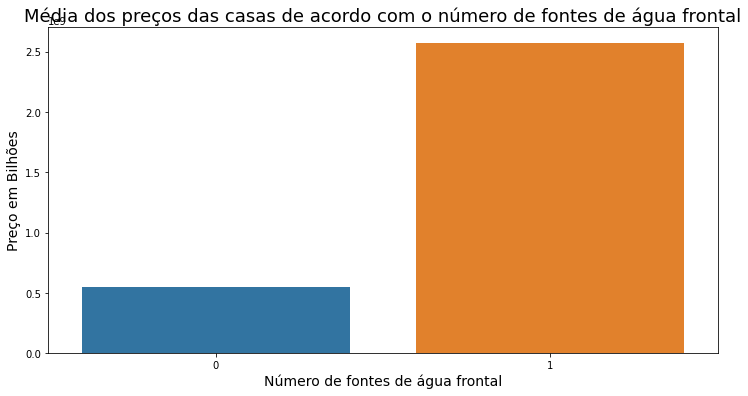

In [41]:
ax = sns.barplot(x = [0,1], y = df_floors.groupby('waterfront').price.mean())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de fontes de água frontal', fontsize=18)
ax.set_xlabel('Número de fontes de água frontal', fontsize=14)
ax.set_ylabel('Preço em Bilhões', fontsize=14)

Text(0, 0.5, 'Preço em Milhões')

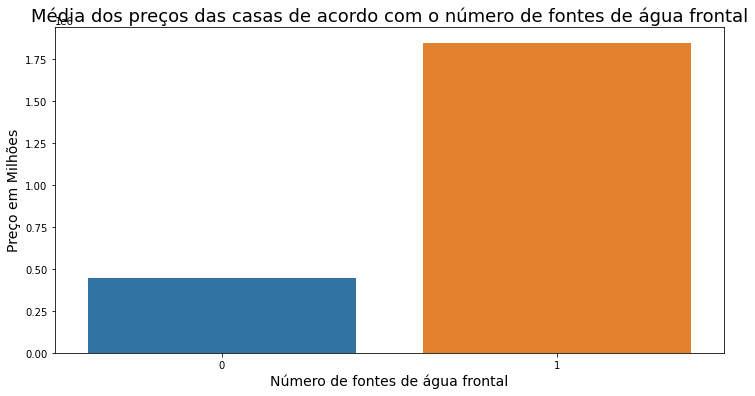

In [42]:
ax = sns.barplot(x = [0,1], y = df_floors.groupby('waterfront').price.median())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de fontes de água frontal', fontsize=18)
ax.set_xlabel('Número de fontes de água frontal', fontsize=14)
ax.set_ylabel('Preço em Milhões', fontsize=14)

Text(0, 0.5, 'Preço em 10 Bilhões')

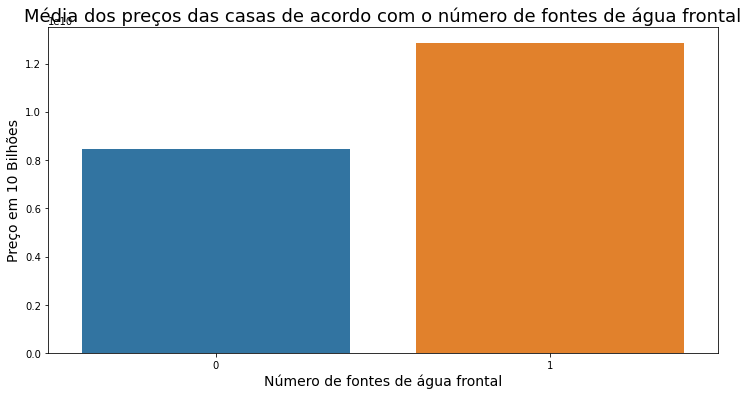

In [43]:
ax = sns.barplot(x = [0,1], y = df_floors.groupby('waterfront').price.std())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de fontes de água frontal', fontsize=18)
ax.set_xlabel('Número de fontes de água frontal', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

<h2> Sobre os resultados acima, vemos que com uma mediana na casa dos milhões e com o desvio padrão e média na casa dos bilhões podemos concluir que a fonte pode até influênciar o valor, mas certamente não é um fator principal neste quesito.</h2>

In [44]:
view = DataFrame['view'].value_counts().sort_index()
save = view.tolist()
#print(view)
for i in range(len(view)):
    meanVal = DataFrame[DataFrame['view'] == i]
    print('a média de valor para', i, 'vista(s) é de:', format(meanVal['price'].mean(),'.1E'))
    save[i] = (meanVal['price'].mean())

a média de valor para 0 vista(s) é de: 3.8E+08
a média de valor para 1 vista(s) é de: 1.9E+09
a média de valor para 2 vista(s) é de: 1.3E+09
a média de valor para 3 vista(s) é de: 2.7E+09
a média de valor para 4 vista(s) é de: 4.9E+09


In [45]:
classes = [0, 0.99, 1.99, 2.99, 3.99, 100]
labels = [ 0, 1, 2, 3, '4+']
df_view = DataFrame
df_view['frequencia'] =  pd.cut(x = df_view.view,
         bins = classes,
         labels = labels,
         include_lowest = True)

Text(0, 0.5, 'Preço em Bilhões')

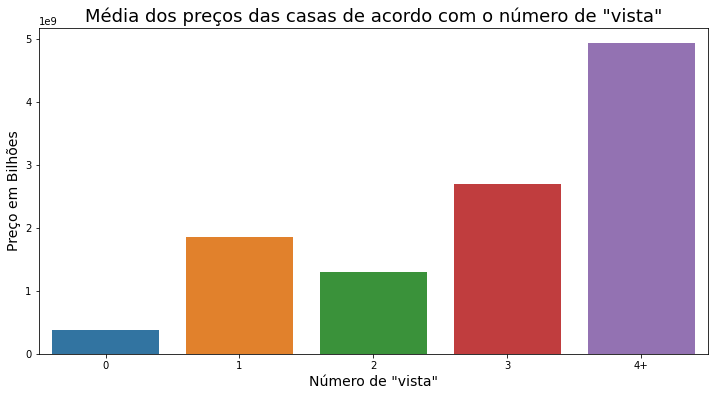

In [46]:
ax = sns.barplot(x = labels, y = df_view.groupby('frequencia').price.mean())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de "vista"', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço em Bilhões', fontsize=14)

Text(0, 0.5, 'Preço em Milhões')

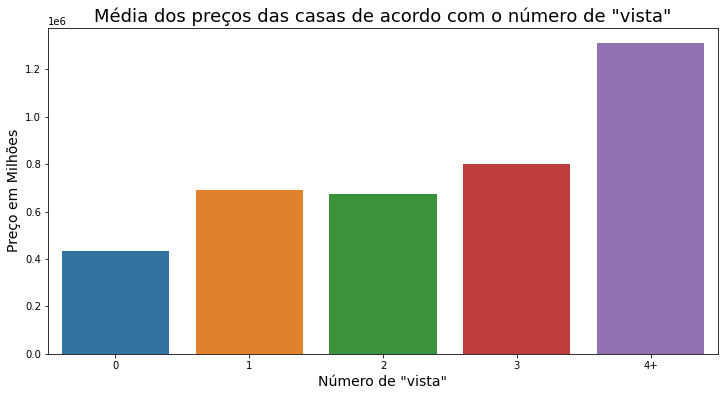

In [47]:
ax = sns.barplot(x = labels, y = df_view.groupby('frequencia').price.median())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de "vista"', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço em Milhões', fontsize=14)

Text(0, 0.5, 'Preço em 10 Bilhões')

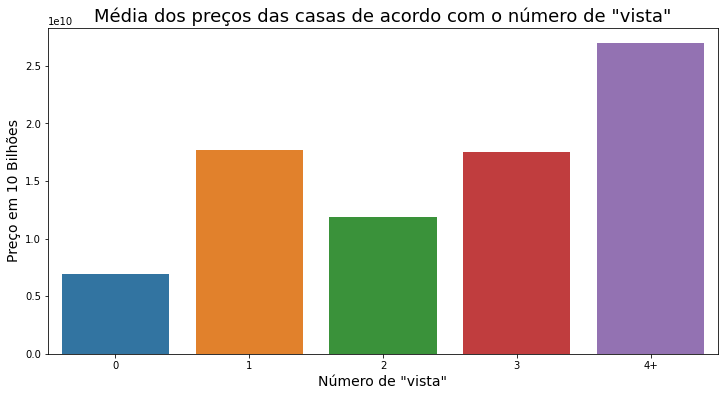

In [48]:
ax = sns.barplot(x = labels, y = df_view.groupby('frequencia').price.std())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de "vista"', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

<h2> Pelos dados acima pode-se dizer que é interessante para a empresa observar quais casas possuem uma(1) vista no mínimo e de preferência 4 vistas. Isso se dá por conta da média e mediana crescente de acordo com o n° de vistas, porém o desvio padrão é muito alto. Sendo assim, a vista afeta o preço, porém não é garantia de uma valorização gigantesca na casa.</h2>


<br>
<br>
<br>

<h2>Respondendo as perguntas do início:</h2>

In [49]:
classes = [0, 2000, 5000, 10000, 12000, 100000]
labels = [ '0-2000', '2000-5000', '5000-10000', '10000-12000', '12000+']

df_sqf = DataFrame
df_sqf['frequencia'] = pd.cut(x = df_sqf.sqft_living,
         bins = classes,
         labels = labels,
         include_lowest = True)

Text(0, 0.5, 'Preço em 10 Bilhões')

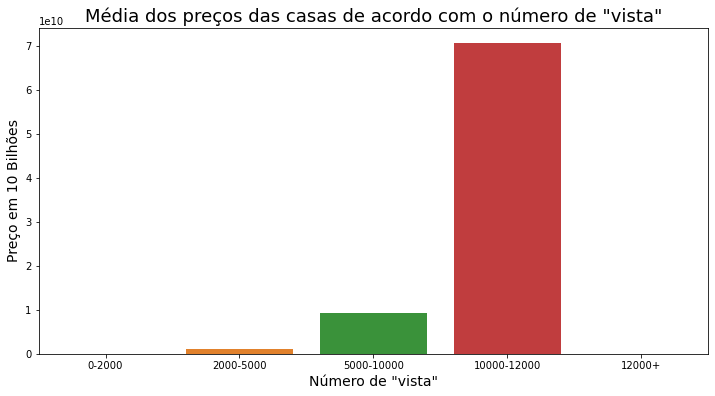

In [50]:
ax = sns.barplot(x = labels, y = df_sqf.groupby('frequencia').price.mean())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de "vista"', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

Text(0, 0.5, 'Preço em 10 Bilhões')

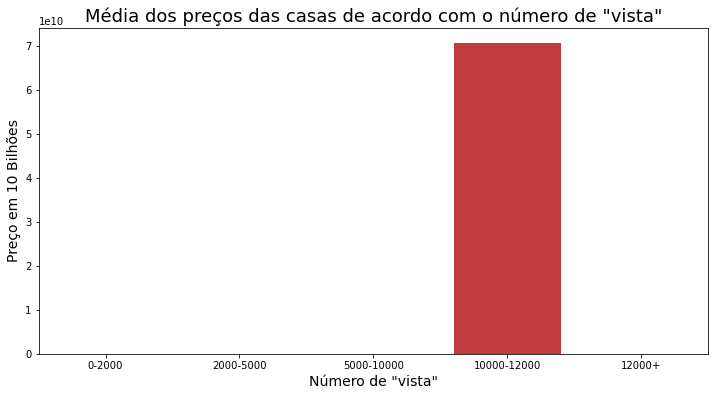

In [51]:
ax = sns.barplot(x = labels, y = df_sqf.groupby('frequencia').price.median())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de "vista"', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

Text(0, 0.5, 'Preço em 10 Bilhões')

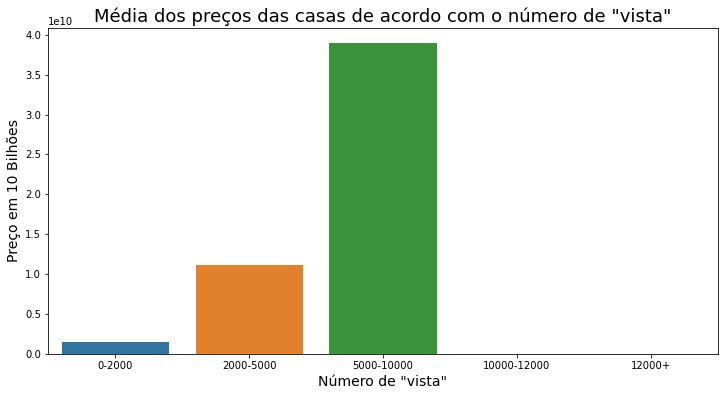

In [52]:
ax = sns.barplot(x = labels, y = df_sqf.groupby('frequencia').price.std())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de "vista"', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

Text(0, 0.5, 'Preço em 10 Bilhões')

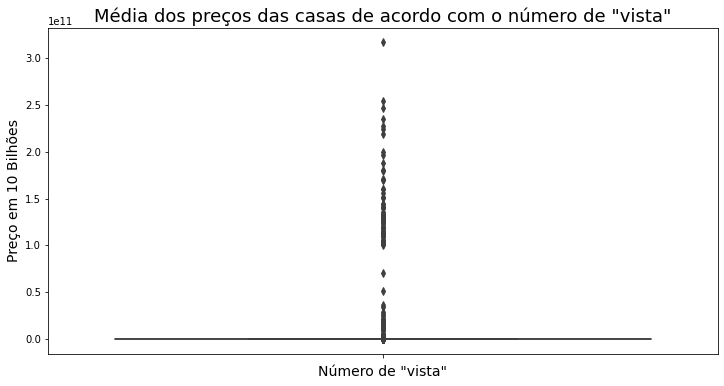

In [55]:
ax = sns.boxplot(y = DataFrame.price)

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de "vista"', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

Text(0, 0.5, 'Preço em 10 Bilhões')

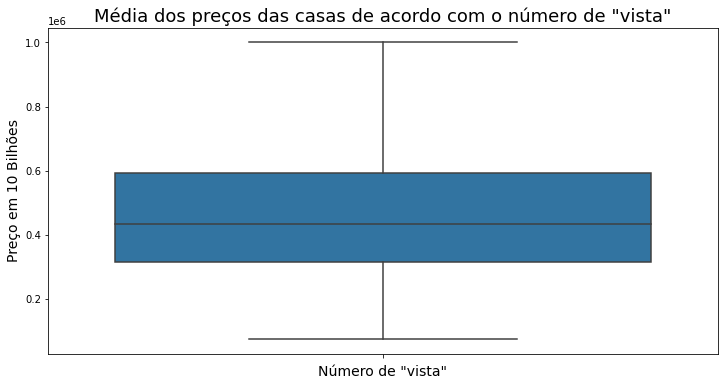

In [56]:
ax = sns.boxplot(y = DataFrame.query('price < 1000000').price)

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de "vista"', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

<h1>Dado os boxplots, é notada a presença de diversos outliers que distorcem as informações. Sendo assim, o projeto será refatorado dividindo as bases em duas bases de dados, Casas e Casas de Luxo.</h1>

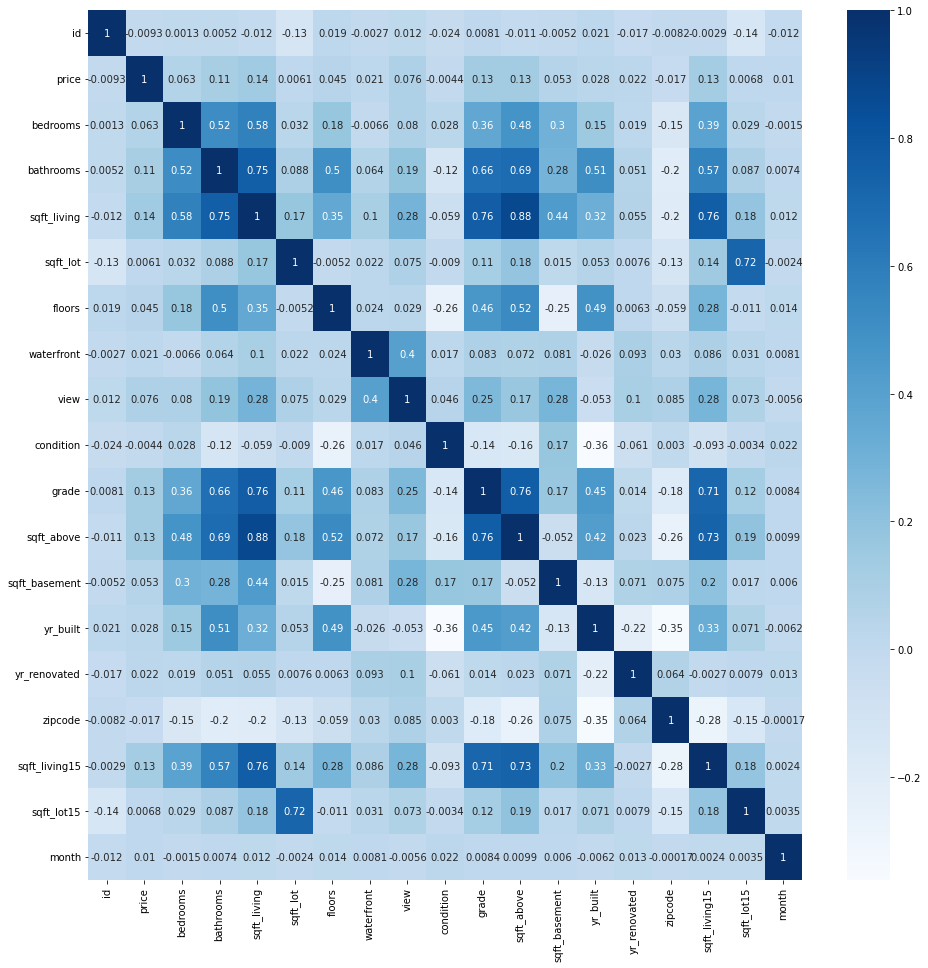

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

corrMatrix = DataFrame.corr(method='pearson')
plt.figure(figsize=(16, 16))
sns.heatmap(corrMatrix, cmap="Blues", annot=True)
plt.show()

In [58]:
vet_corr = corrMatrix.unstack()
maior_corr = vet_corr.where((vet_corr >= 0.7) & (vet_corr < 1)).dropna().sort_values(kind="quicksort", ascending=False)
maior_corr

sqft_living    sqft_above       0.876597
sqft_above     sqft_living      0.876597
sqft_living    grade            0.762704
grade          sqft_living      0.762704
sqft_living    sqft_living15    0.756420
sqft_living15  sqft_living      0.756420
grade          sqft_above       0.755923
sqft_above     grade            0.755923
bathrooms      sqft_living      0.754665
sqft_living    bathrooms        0.754665
sqft_above     sqft_living15    0.731870
sqft_living15  sqft_above       0.731870
sqft_lot       sqft_lot15       0.718557
sqft_lot15     sqft_lot         0.718557
grade          sqft_living15    0.713202
sqft_living15  grade            0.713202
dtype: float64

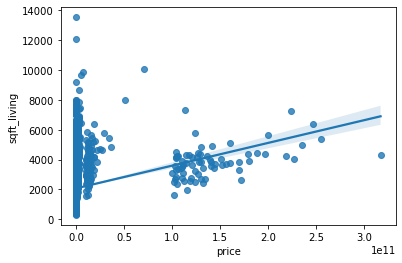

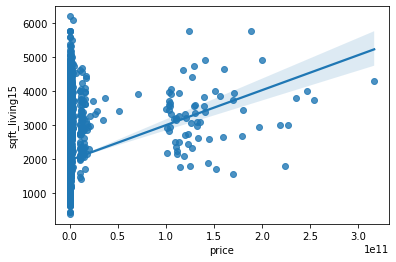

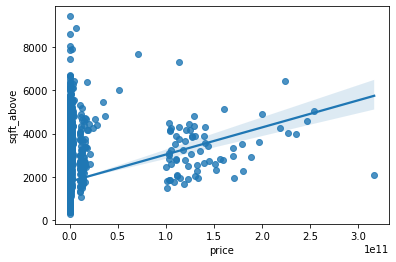

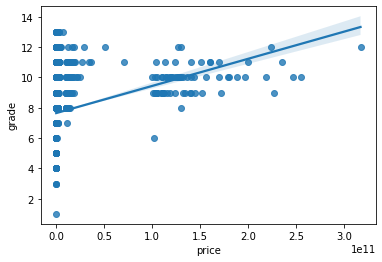

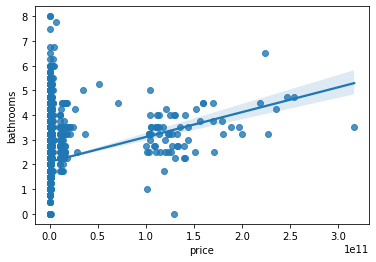

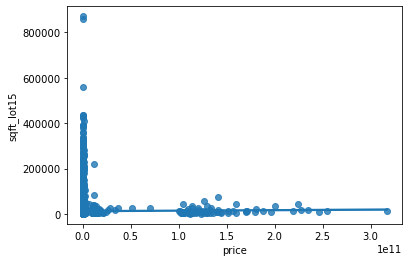

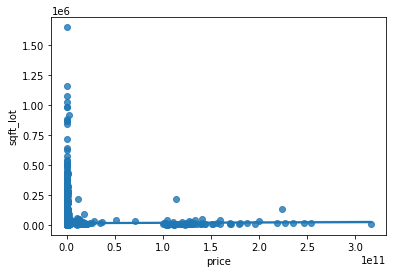

In [59]:
cols_names = ["sqft_living", "sqft_living15", "sqft_above", "grade", "bathrooms", "sqft_lot15", "sqft_lot"]
for name in cols_names:
    sns.regplot(x=DataFrame["price"], y=DataFrame[name])
    plt.show()


# Trazendo os gráficos usados na parte 3 de volta para parte 2, fica claro que a escolha de analisar um grupo limitado ao preço de 1 milhão foi uma ótima decisão, pois os gráficos mostram como as casas com valores acima disto se distanciam muito das demais.